# **IBM EMPLOYEE ATTRITION**
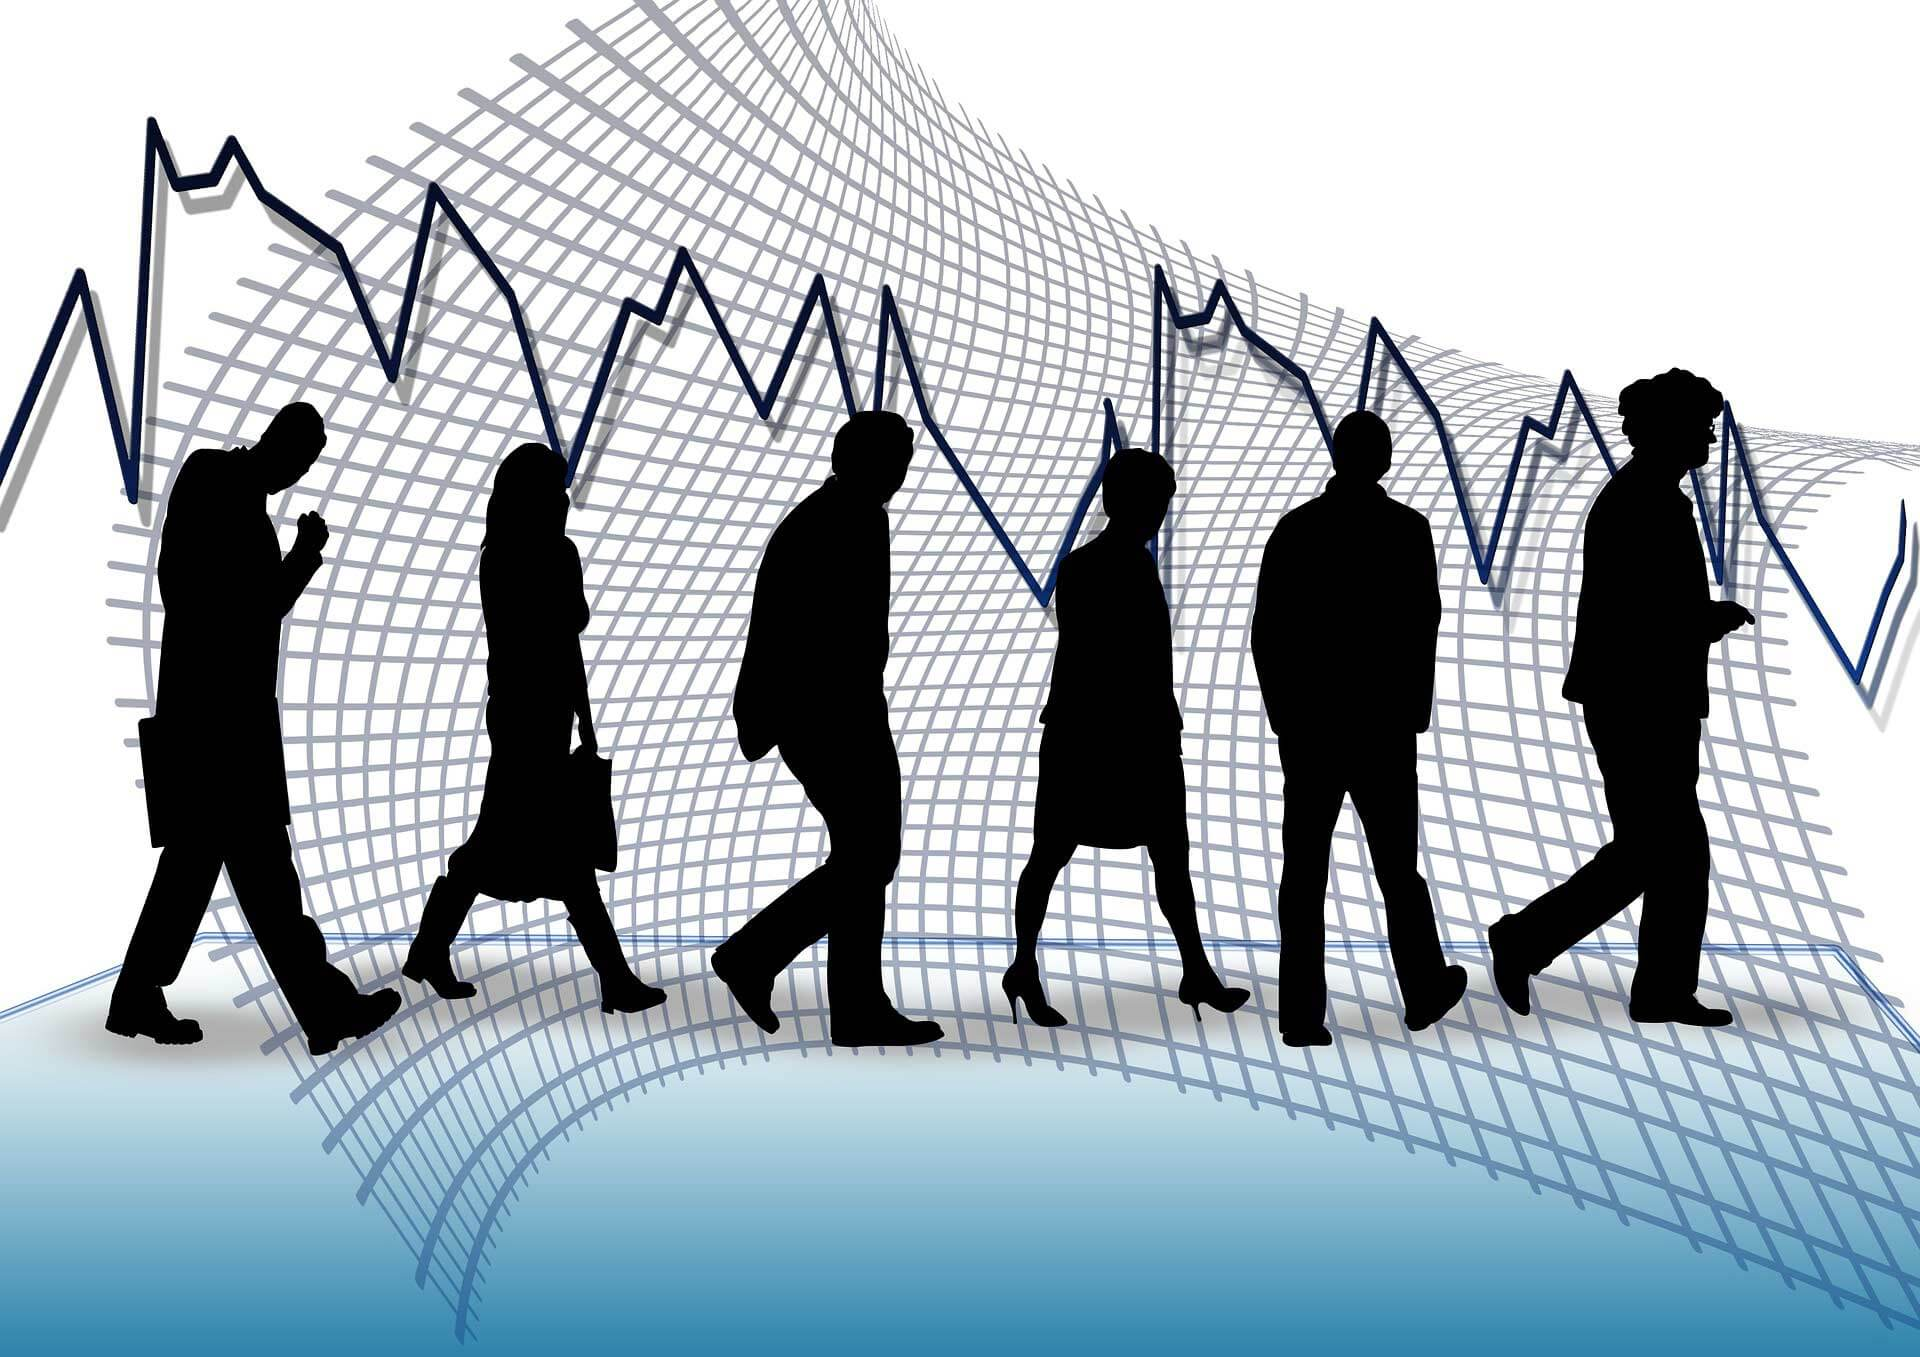

# **TABLE OF CONTENT**

**1. INTRODUCTION**
> 1.0  OVERVIEW<BR>1.1  DATA DESCRIPTION

**2. RESPOSITORY**
> 2.0 IMPORT LIBRARIES<BR>2.1 DATA EXTRACTION<BR> 2.2 LOAD DATA SET

**3. DATA CLEANING**
> 3.O CHECK COLUMN INFORMATION<BR> 3.1 CHECK FOR MISSING VALUES<BR> 3.2 CHECK FOR DUPLICATE VALUES<BR> 3.3 CHECK DATATYPES <BR>3.4 DROP UNNECESSARY COLUMNS

**4. EXPLORATORY DATA ANALYSIS**
> 4.0 EDA<BR> 4.1 UNDERSTANDING THE VARIABLES<BR>4.2 RELATIONSHIP BETWEEN VARIABLES

**5. ANSWERING THE FIVE MAJOR QUESTIONS**
> 5.0 WHAT ARE THE 3 FACTORS BEHIND EMPLOYEE ATTRITION?<BR> 5.1 WHAT IS THE RELATIONSHIP BETWEEN EDUCATION AND MONTHLY INCOME?<BR> 5.2 WHAT IS THE EFFECT OF AGE ON ATTRITION?<BR> 5.3 IS INCOME THE MAIN FACTOR IN EMPLOYEE ATTRITION?<BR> 5.4 HOW DOES WORK-LIFE BALANCE IMPACT THE OVERALL ATTRITION RATE?

**6. CONCLUSION**

**7. RESOURCES**

# **INTRODUCTION**

## **1.0 OVERVIEW**

This project will extract, clean and visualize the dataset from the IBM employee attrition and the possible factors for employee attrition using <b>sql</b> and <b>pandas</b>.
Employee attrition is the process of workers leaving a company for a variety of reasons, either voluntary or involuntary, without being immediately replaced. Employee attrition refers to the gradual reduction in the number of employees. Employee attrition occurs when your workforce shrinks over time. This means that employees are being hired at a faster rate than they are being replaced. Employee attrition occurs when a worker retires, resigns, or is not replaced.

 Information to work in this project is gotten from the <b>attrition_records</b> table in the [attr_data](https://drive.google.com/file/d/13cdx4kWB6-WZe1VTjPqnFRgYzzGZHt2x/view) dataset. This project entails extracting the database with <b>sql</b>, importing with <b>pandas</b> and analyzing the data. The project processes include;


*   Data Extraction
*   Data Cleaning
*   Data Analysis
*   Data Interpretation

The project's goal is to answer five questions which are:



1.   What do you think are the 3 factors behind employee attrition?
2.   What is the relationship between education and monthlyIncome?
3.   What is the effect of age on attrition?
4.   Is income the main factor in employee attrition?
5.   How does work-life balance impact the over all attrition rate?



## **1.1 DATA DESCRIPTION**

This dataset contains a variety of information about IBM employees. The key characteristics of this dataset are listed below.

Dataset Glossary (Column-wise)


*  id                        
*   Age                       
*  Attrition                 
*  BusinessTravel            
*  DailyRate                 
*   Department                
*   DistanceFromHome         
*  Education                 
*  EducationField            
*  EmployeeCount             
*  EmployeeNumber            
* EnvironmentSatisfaction   
*   Gender                    
*   HourlyRate                
*   JobInvolvement           
*   JobLevel                  
*  JobRole                   
*   JobSatisfaction            
*  MaritalStatus             
*   MonthlyIncome             
*  MonthlyRate               
*  NumCompaniesWorked        
*   Over18                    
*   OverTime                  
*   PercentSalaryHike          
*   PerformanceRating          
*   RelationshipSatisfaction  
*   StandardHours             
*   StockOptionLevel          
*   TotalWorkingYears         
*   TrainingTimesLastYear      
*   WorkLifeBalance            
*   YearsAtCompany            
*  YearsInCurrentRole        
*  YearsSinceLastPromotion    
*  YearsWithCurrManager         

The keys for the IBM employee attrition dataset is listed below;


*   Education;  1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"
*   EnvrionmentSatisfaction; 1: "Low", 2: "Medium", 3: "High", 4: "Very High"
*   JobInvolvement; 1: "Low", 2: "Medium", 3: "High", 4: "Very High"
*   JobSatisfaction;  1: "Low", 2: "Medium", 3: "High", 4: "Very High"
*   PerformanceRating; 1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"
*   RelationshipSatisfaction; 1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"
*   WorkLifeBalance; 1: "Bad", 2: "Good", 3: "Better", 4: "Best"





    
   
 

# **2. REPOSITORY**


##**2.0 IMPORT LIBRARIES**

Importing libraries is a critical step before loading the dataset. It is critical to import only the libraries that you are certain you will need to work with your dataset. To import to libraries, use the keyword *import*.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
import sqlite3
from typing import List, Tuple, Dict, Union
import warnings
warnings.filterwarnings('ignore')
%load_ext sql

## **2.1 DATA EXTRACTION**

The process of collecting or retrieving disparate types of data from a variety of sources, many of which may be poorly organized or completely unstructured, is known as data extraction. Data extraction allows you to consolidate, process, and refine data so that it can be stored in a centralized location and transformed later. The process of converting data from one format to a more "useful" format for further processing is referred to as data extraction.<br>
The data needed for this project is extracted from the database source using <b>sql</b>.

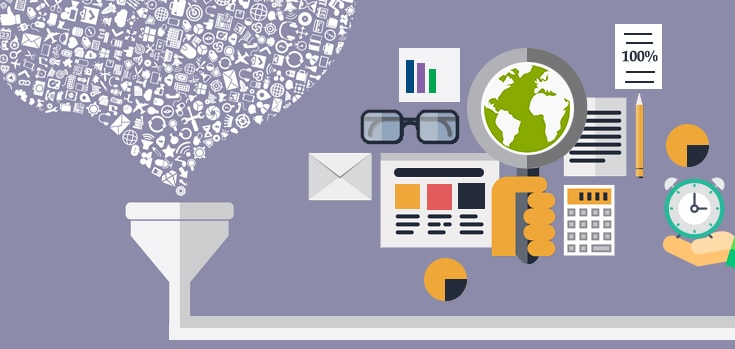

In [2]:
# connecting colab to where the database is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# using sqlalchemy to create an engine in order to extract the database
from sqlalchemy import create_engine
my_conn = create_engine("sqlite:////content/drive/MyDrive/Database/attr_data.db")

In [4]:
# checking the tables contained in the attr_data database
table = my_conn.execute(""" select name from sqlite_master""")
for row in table:
  print(row)

('attrition_records',)
('sqlite_sequence',)


This shows there are two table names in the attr_data. The only table to work with in this project is the ***attrition_records***

## **2.2 LOAD DATA SET**

In [5]:
# reading the extracted table using pandas using the sqlalchemy engine created earlier

# stored the dataset in a variable called Attr
Attr = pd.read_sql_table("attrition_records", my_conn) 

In [6]:
# to view the first 5 rows in the attr_data
Attr.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


The above gives the first 5 rows of the dataset.

In [7]:
# to view the last 5 rows in the attr_data
Attr.tail()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8
1469,1470,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,...,1,80,0,6,3,4,4,3,1,2


The above gives the last 5 rows of the dataset.

# **3. DATA CLEANING**


Data cleaning is the process of repairing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data from a dataset. Data cleaning is the process of removing data that does not belong in your dataset.


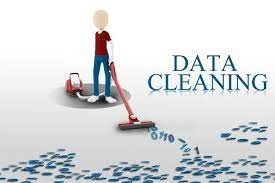

## **3.0 CHECK COLUMN INFORMATION**

In [8]:
# to view all the columns in the attr_data dataset
Attr.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

The keyword <b>.columns</b> gives the list of all the columns in a data.

In [9]:
# to provide the mean, standard deviation and the five summary of a numerical vairable
Attr.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


This shows the count, mean, standard deviation, minimum and maximum values and the quantiles of each quantitative column in the dataset.

In [10]:
# to get the information(datatype and null) about the columns in a dataset
Attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

This dataset contains both categorical and numerical values. The categorical values are those that have <b>object</b> as their Dtype while the numerical values are those that have <b>int64</b> as their Dtype.

In [11]:
# to view the number of rows and columns
Attr.shape

(1470, 36)

This dataset has <b>1470</b> rows and <b>36</b> columns

## **3.1 CHECK FOR MISSING VALUES**

In [12]:
# this returns the number of rows that has missing values in a column
Attr.isnull().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

There are no null values in the dataset

## **3.2 CHECK FOR DUPLICATE VALUES**

In [13]:
# this checks for duplicated values  for each row and returns false if no duplicated values are found
Attr.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

There are no duplicate rows in the dataset

## **3.3 CHECK DATATYPE OF COLUMNS**


In [14]:
# grouping the columns in the dataset into numerical and categorical
numerical_vars = [var for var in Attr.columns if Attr[var].dtype != "O"]
categorical_vars = [var for var in Attr.columns if Attr[var].dtype == "O"]

numerical_vars, categorical_vars

(['id',
  'Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'])

This shows that in this dataset;  <b>id,
  Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement,JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate,NumCompaniesWorked, PercentSalaryHike, PerformanceRating,RelationshipSatisfaction, StandardHours, StockOptionLevel,TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance,YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager</b> are <b>numerical variables</b>, while <b>Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18,
OverTime</b> are <b>categorical</b>.

#### **CHECKING THE VALUES IN SOME COLUMNS**



In [15]:
# .unique keyword gives the unique values in a column
unique_1 = Attr["PerformanceRating"].unique()
unique_2 = Attr["Age"].unique()
unique_3 = Attr["DistanceFromHome"].unique()
unique_4 = Attr["MonthlyRate"].unique()

print(unique_1, unique_2, unique_3, unique_4)

[3 4] [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13] [19479 24907  2396 ...  5174 13243 10228]


The above gives the unique values in the columns; **PerformanceRating, Age,** **DistanceFromHome, MonthlyIncome**

In [16]:
# checking for outliers
Attr.kurtosis()

id                         -1.200000
Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EmployeeCount               0.000000
EmployeeNumber             -1.223179
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StandardHours               0.000000
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
d

In comparison to a normal distribution, kurtosis determines whether the data is heavy-tailed or light-tailed. The kurtosis of a distribution is calculated by comparing it to a normal distribution. Kurtosis is used to identify outlier values in a dataset. A standard normal distribution has kurtosis of 3, whereas a leptokurtic distribution has kurtosis > 3, indicating that there are more chances of outliers. A platykurtic distribution has kurtosis 3, indicating that it is flatter (less peaked) than the normal distribution. The kurtosis shown above indicates that there aren't many outliers in the dataset, so it can be used without changing the figures.

**The above views show that the dataset is clean and that the columns appear to be correct. Because not all columns in this dataset are required to answer the questions, some columns will be removed in the next step.**

## **3.4 DROP UNNECESSARY COLUMNS**

Because not all columns are required to answer the questions in this project, some columns will be removed. Removing these unnecessary variables will help focus on the variables that will answer the questions in this project. Columns to be removed include:

*   BusinessTravel
*   DailyRate
*   Department
*   DistanceFromHome
*   EducationField
*   EmployeeCount
*   EmployeeNumber
*   Gender
*   HourlyRate
*   JobLevel
*   JobRole
*   MaritalStatus
*   NumCompaniesWorked
*   PercentSalaryHike
*   StockOptionLevel
*   TrainingTimesLastYear
*   YearsSinceLastPromotion
*   YearsWithCurrManager





In [17]:
# saving the above mentioned columns in a variable called employee_ drop
Employee_drop = ["BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "EducationField", "EmployeeCount", "Over18", "MonthlyRate", "StandardHours", "YearsInCurrentRole", "EmployeeNumber", "Gender", "HourlyRate", "JobLevel", "JobRole", "MaritalStatus", "NumCompaniesWorked", "PercentSalaryHike", "StockOptionLevel", "TrainingTimesLastYear", "YearsSinceLastPromotion", "YearsWithCurrManager"]

In [18]:
 # making a copy of the exsisting dataset
Attr_1 = Attr.copy() 

# dropping the unneeded columns stored in the Employee_drop variable
Attr_1 = Attr_1.drop(columns = Employee_drop) 

# comparing the first dataset with the newly created
Attr.shape, Attr_1.shape 

((1470, 36), (1470, 14))

Attr_1 shows that 22 columns have been dropped. Attr_1 would be the new dataframe to be used.

In [19]:
# to view the columns in the newly created copy
Attr_1.columns

Index(['id', 'Age', 'Attrition', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

# **4. EXPLORATORY DATA ANALYSIS**

## **4.0 EDA**

Exploratory data analysis is a method for better understanding your data and assisting in subsequent data preprocessing. It is the critical process of conducting preliminary data investigations to discover patterns, identify anomalies, test hypotheses, and validate assumptions using summary statistics and graphical representations. Exploratory Data Analysis (EDA) is a step in the Data Analysis Process that employs a variety of techniques to better understand the dataset under consideration. Exploratory Data Analysis accomplishes two major tasks:
1. It aids in the cleanup of a dataset.
2. It improves your understanding of the variables and their relationships.

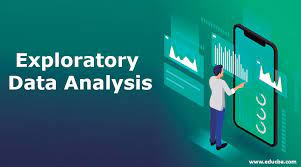

## **4.1 UNDERSTANDING THE VARIABLES**

The <b>.describe</b> keyword can be used to get the mean, standard deviation 

1.   List item
2.   List item

and a five number summary of each numerical feature.
The five number summary are Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum. The <b>.desribe</b> keyword can also be used to get the desription of specific columns as seen below for the <b>MonthlyIncome</b> column in the dataset.

Individual statistical measures can also be calculated by using the following commands:

    - df.count()
    - df.mean()
    - df.std()
    - df.min()
    - df.quantile([0.25, 0.5, 0.75], axis = 0)
    - df.median()
    - df.max()
    - df.mode()

In [20]:
# to check the description of the monthlyinccome column
Attr_1.MonthlyIncome.describe() 

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

The above shows the mean, standard deviation and a five number summary of the MonthlyIncome.

The following can be used to check <b>distribution</b> of numerical variables:

    - histogram
    - density plot
    - box plot
    - violin plot

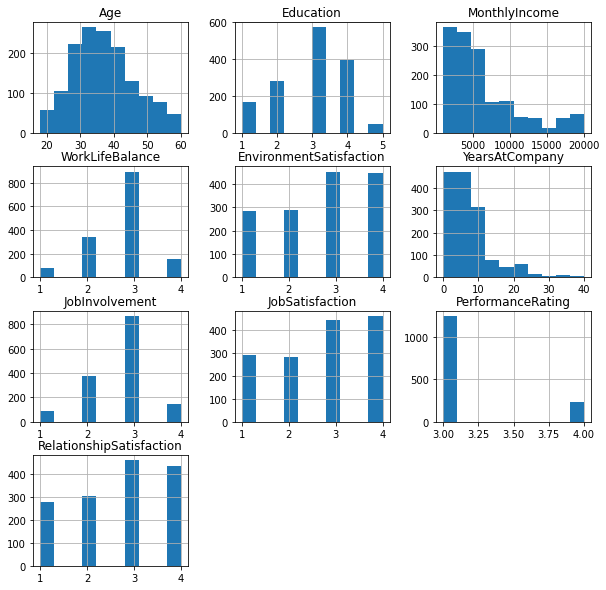

In [21]:
# create a list of all numerical features in the dataset attr_1
features = ['Age', 'Education', 'MonthlyIncome', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'YearsAtCompany', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction'] 

# plot a histogram to show the above features at the same time
Attr_1[features].hist(figsize=(10,10));

The above shows the histogram representation of the variables; 


*   Age
*   Education
*   MonthlyIncome
*   WorkLifeBalance
*   EnvironmrntSatisfaction
*   YearsAtCompany
*   JobInvolvement
*   JobSatisfaction
*   PerformanceRating
*   RelationshipSatisfaction




A list of numerical features were created to visualise these variables at the same time.

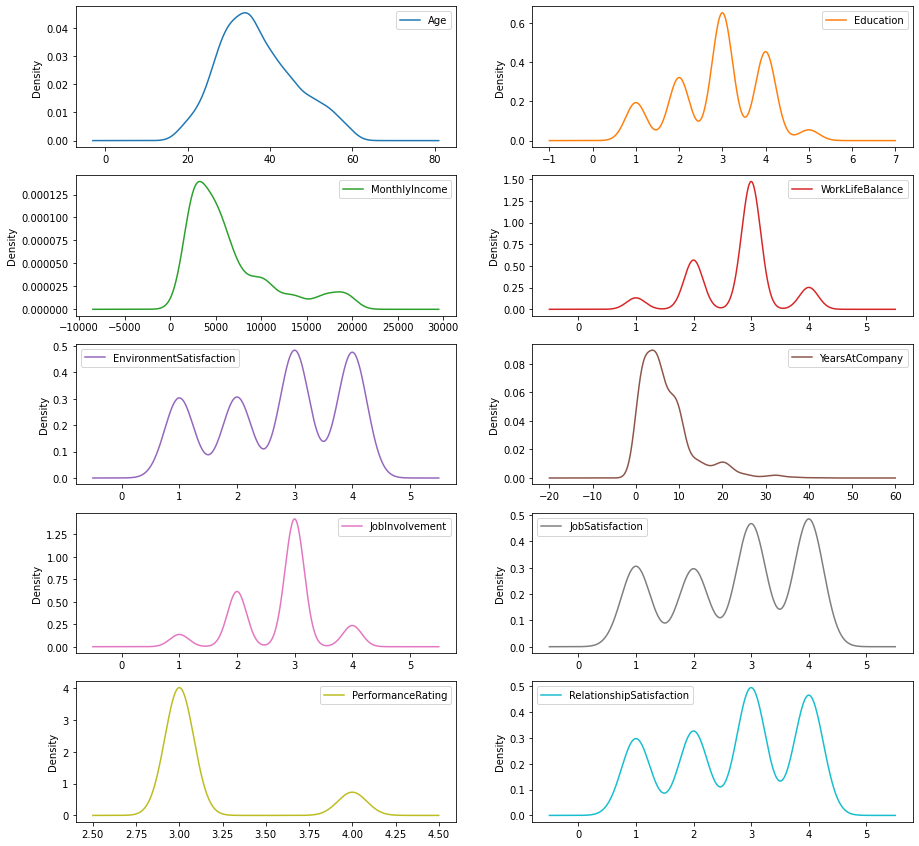

In [22]:
# density plot of the numerical features above
Attr_1[features].plot(kind='density', subplots=True, layout=(5, 2), sharex=False, figsize=(15, 15));

The above shows a density plot representation of the variables;


*   Age
*   Education
*   MonthlyIncome
*   WorkLifeBalance
*   EnvironmrntSatisfaction
*   YearsAtCompany
*   JobInvolvement
*   JobSatisfaction
*   PerformanceRating
*   RelationshipSatisfaction

A list of numerical features were created to visualise these variables at the same time.

**KDE** stands for **Kernel Density Estimator**. A KDE plot gives us the sense of a univariate curve. The KDE plots of four numerical variables are listed below.

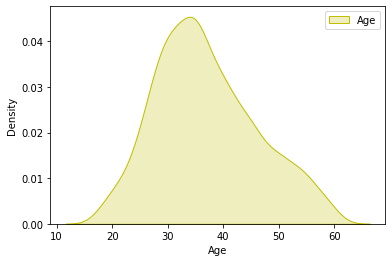

In [23]:
# kdeplot for age variable in the attr_1 dataset
# using a figure size of 20 by 15
figsize = (20, 15)

# adding yellow as the colour
sns.kdeplot(Attr_1['Age'], shade=True, color = "y")

#using the .legend to display the label
plt.legend(['Age'])

# adding the x-axis with label name Age
plt.xlabel("Age")
plt.show()


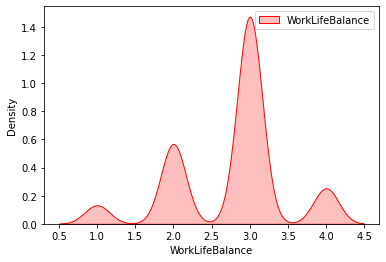

In [24]:
# kdeplot for workinglifebalance variable in the attr_1 dataset
# using a figure size of 20 by 15
figsize = (20, 15)

# adding red as the colour
sns.kdeplot(Attr_1['WorkLifeBalance'], shade=True, color = "red")

#using the .legend to display the label
plt.legend(['WorkLifeBalance'])

# adding the x-axis with label name worklifebalance
plt.xlabel("WorkLifeBalance")
plt.show()


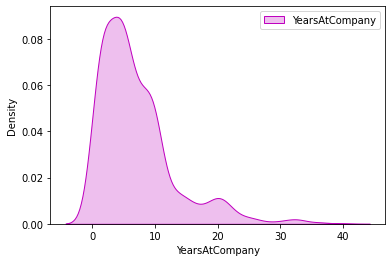

In [25]:
# kdeplot for yearsatcompany variable in the attr_1 dataset
# using a figure size of 20 by 15
figsize = (20, 15)

# adding magenta as the colour
sns.kdeplot(Attr_1['YearsAtCompany'], shade=True, color = "m")

#using the .legend to display the label
plt.legend(['YearsAtCompany'])

# adding the x-axis with label name Yearsatcompany
plt.xlabel("YearsAtCompany")
plt.show()


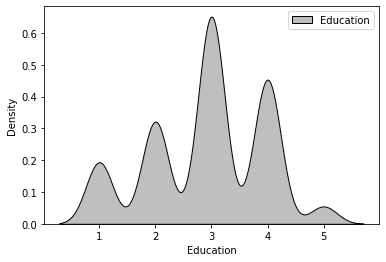

In [26]:
# kdeplot for Education variable in the attr_1 dataset
# using a figure size of 20 by 15
figsize = (20, 15)

# adding black as the colour
sns.kdeplot(Attr_1['Education'], shade=True, color = "k")

#using the .legend to display the label
plt.legend(['Education'])

# adding the x-axis with label name Education
plt.xlabel("Education")
plt.show()




According to the histogram and density plot above, 
* **Age** is positively skewed and has majority of employees aged 30 to 40.
* **Education** can be said to be evenly distributed and has majority of employees having a bachelor's degree, which is represented by 3.
* **MonthlyIncome** is positively skewed and has majority of employees earning between $2500 and 5000.
* **WorkLifeBalance** is negatively skewed and has majority of employees having a better worklife balance.
* **EnvironmentalSatisfaction** is negatively skewed, with high and very high as the majority of employees.
* **YearsAtCompany** is positively skewed and has majority of employees staying for 6 to 10 years.
* **JobInvolvement** is negatively skewed and has majority of employees reporting a high level of jobinvolvement.
* **JobSatisfaction **is a bit negatively skewed and has the job satisfaction as high and very high majorly.
* **PerformanceRating** is positively skewed and has most of the employees having an excellent rating.
* **RelationshipSatisfaction** is negatively skewed and has most of the employees having an excellent relationship satisfaction.


 **The right tail of the distribution is longer in positive skewness while the left tail of the distribution is longer in negative skewness.**

The plot that can be used to check <b>distribution</b> of categorical variables is:

    - bar plot

#### **To check the counts of attrition in the dataset (by the categories of <b>Yes</b> and <b>No</b>).**

The code below shows that in the attr_data, <b>237</b> employees have been
attrited while <b>1233</b> employees have not been attrited. The barplot and countplot also confirm this. <b>The .value_counts</b> keyword groups a column into unique values in that column and returns the count.

In [27]:
# to get the value count of the employees by attrition
Attr_1["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [28]:
# to get the percentage of attrition
(Attr_1["Attrition"].value_counts() / Attr_1["Attrition"].count())*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

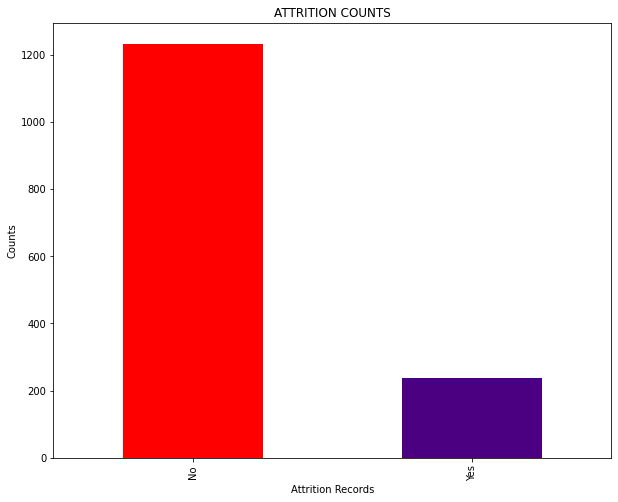

In [29]:
# to show a bar plot of attrition

# storing 2 colours to use in a variable called mycolours
mycolours = ["r", "#4B0082"]

# to get the value count by attrition and name the kind of plot to use
Attr_1.Attrition.value_counts().plot(kind = "bar", color = mycolours, figsize = (10, 8))

# to write the title of the bar plot
plt.title("ATTRITION COUNTS")

# to label the x and y axis
plt.xlabel("Attrition Records")
plt.ylabel("Counts")

plt.show()

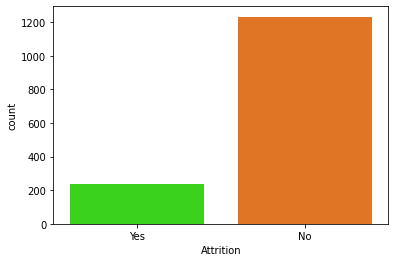

In [30]:
# to show a count plot
# palette for the colour of the bars. 

sns.countplot(Attr_1["Attrition"],palette = "gist_ncar")
plt.show()

##**4.2 RELATIONSHIP BETWEEN VARIABLES**


This section shows and explains the relationship between the vairables in the dataset.

In [31]:
# to get how correlated the numerical vairables are to each other
Attr_1.corr()

,id,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
id,1.000000,-0.010349,0.041901,0.017424,-0.007105,-0.045941,-0.014377,-0.020675,-0.069654,-0.014095,0.010740,-0.011557
Age,-0.010349,1.000000,0.208034,0.010146,0.029820,-0.004892,0.497855,0.001904,0.053535,0.680381,-0.021490,0.311309
Education,0.041901,0.208034,1.000000,-0.027128,0.042438,-0.011296,0.094961,-0.024539,-0.009118,0.148280,0.009819,0.069114
EnvironmentSatisfaction,0.017424,0.010146,-0.027128,1.000000,-0.008278,-0.006784,-0.006259,-0.029548,0.007665,-0.002693,0.027627,0.001458
JobInvolvement,-0.007105,0.029820,0.042438,-0.008278,1.000000,-0.021476,-0.015271,-0.029071,0.034297,-0.005533,-0.014617,-0.021355
JobSatisfaction,-0.045941,-0.004892,-0.011296,-0.006784,-0.021476,1.000000,-0.007157,0.002297,-0.012454,-0.020185,-0.019459,-0.003803
MonthlyIncome,-0.014377,0.497855,0.094961,-0.006259,-0.015271,-0.007157,1.000000,-0.017120,0.025873,0.772893,0.030683,0.514285
PerformanceRating,-0.020675,0.001904,-0.024539,-0.029548,-0.029071,0.002297,-0.017120,1.000000,-0.031351,0.006744,0.002572,0.003435
RelationshipSatisfaction,-0.069654,0.053535,-0.009118,0.007665,0.034297,-0.012454,0.025873,-0.031351,1.000000,0.024054,0.019604,0.019367
TotalWorkingYears,-0.014095,0.680381,0.148280,-0.002693,-0.005533,-0.020185,0.772893,0.006744,0.024054,1.000000,0.001008,0.628133


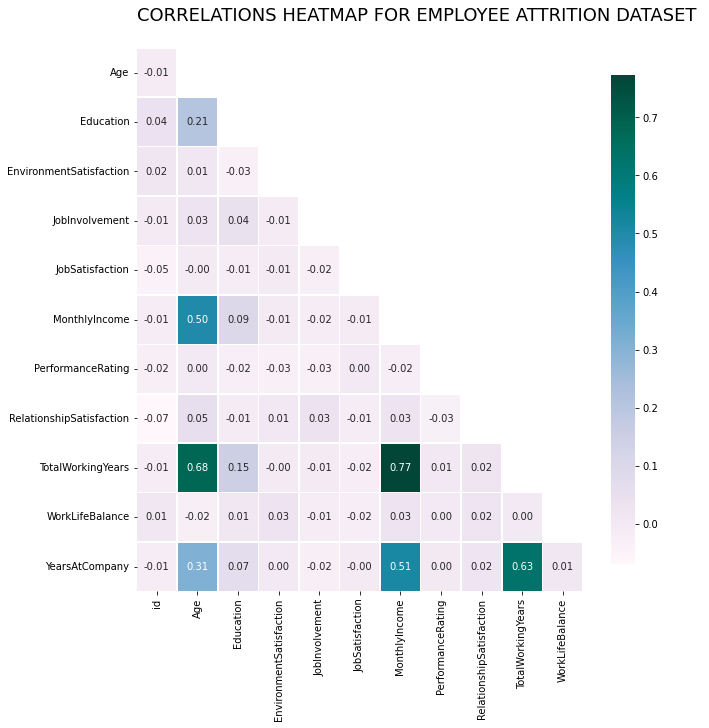

In [32]:
# a graphical representation of the correlation above using heatmap
corr = Attr_1.corr()
ones = np.ones_like(corr, dtype='bool')
mask = np.triu(ones)
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='PuBuGn', linewidths=.6, cbar_kws={'shrink':.9})
ax.xaxis.tick_bottom()
plt.title("Correlations heatmap for Employee Attrition dataset \n".upper(), fontdict={'fontsize': 18}, loc='left')
plt.show()


From the above heatmap, the following can be deduced;

* NO CORRELATION
> EnvironmentSatisfaction and YearAtCompany<br> PerformanceRate and YearAtCompany<br> WorkLifeBalance and TotalWorkingYears<br>PerformanceRate and WorkLifeBalance<br> 
* STRONG POSIITIVE CORRELATION
>TotalWorkingYears and Age<br>MonthlyIncome and YearsAtCompany<br>TotalWorkingYears and YearsAtCompany<br>TotalWorkingYears and MonthlyIncome<br> MonthlyIncome and Age
* WEAK POSITIVE CORRELATION
> Age and YearsAtCompany<br>TotalWorkingYears and Education<br>Age and Education

A pair plot can be used to visualise the relationships between all the numerical features at the same time. The `hue` is set to the feature `Attrition` to indicate which data points have attrition as Yes and those that have attrition as No.

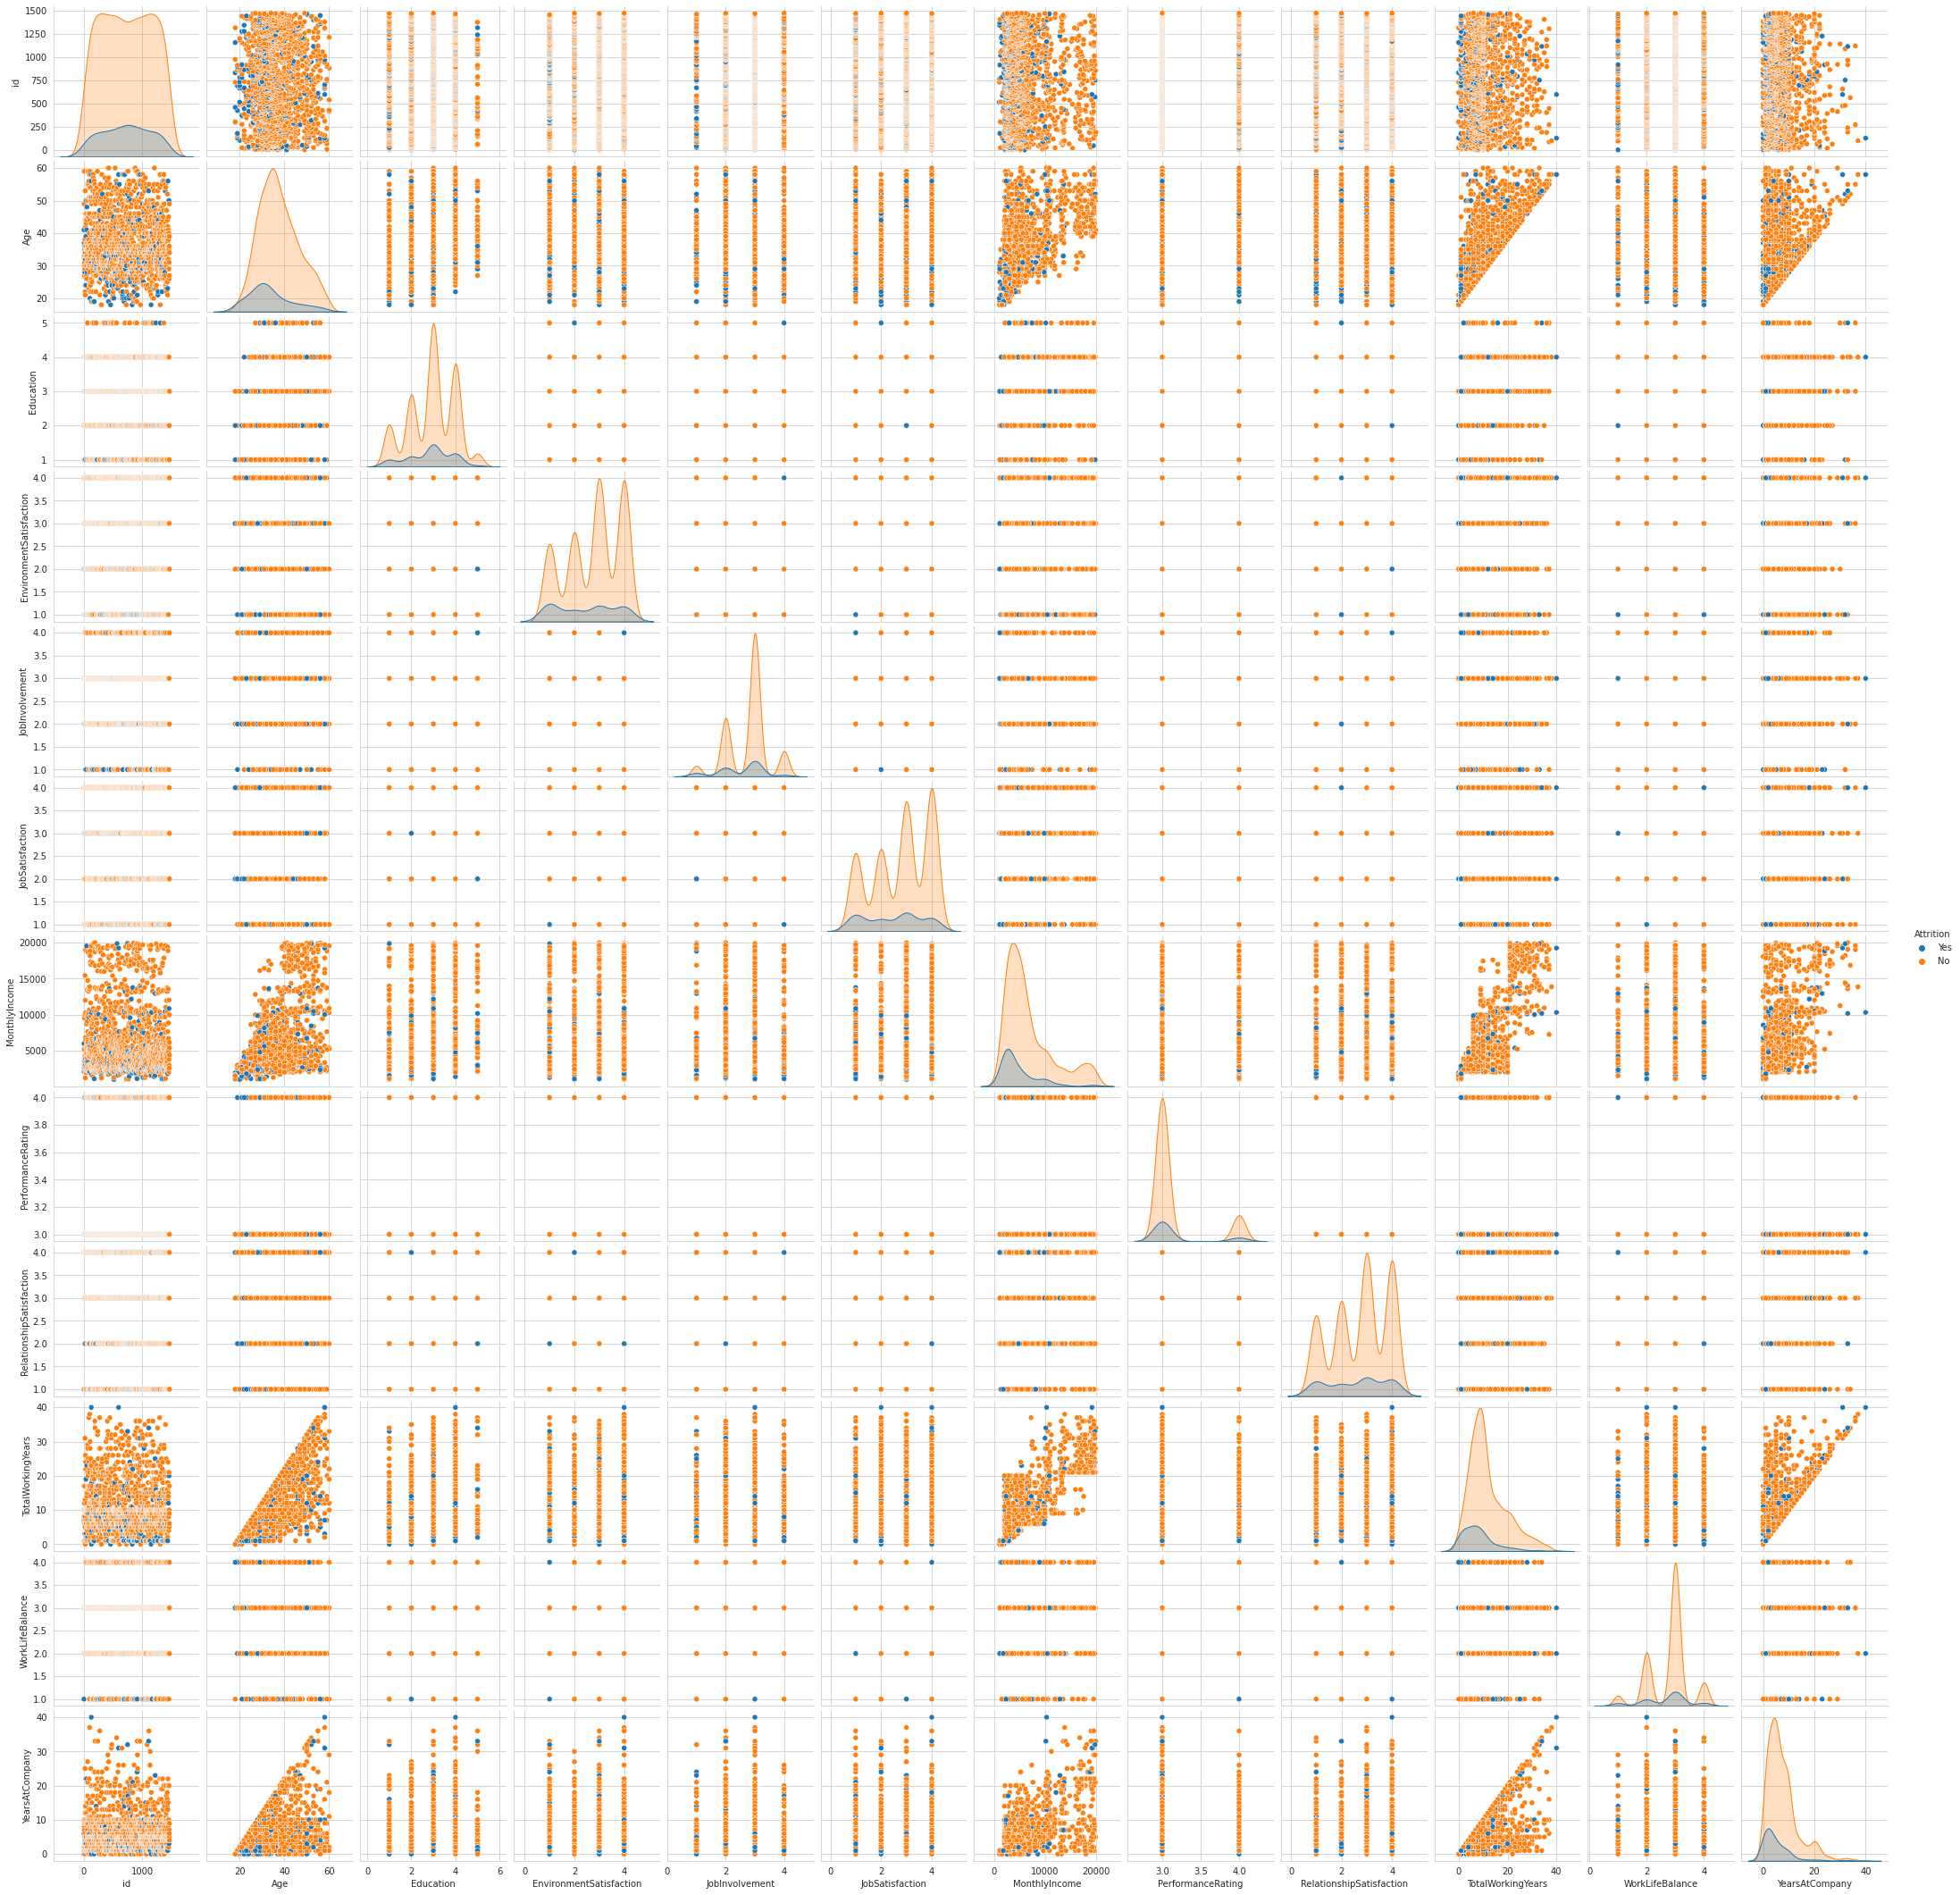

In [33]:
# to view the pair plots using attrition as the hue
sns.set_style("whitegrid");
sns.pairplot(Attr_1, hue="Attrition");
plt.show()

# **5. ANSWERING THE FIVE MAJOR QUESTIONS**


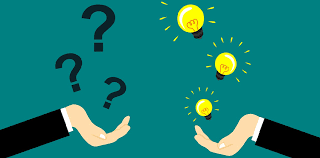

## **5.0 WHAT ARE THE 3 FACTORS BEHIND EMPLOYEE ATTRITION?**

**COMPARING ATTRITION WITH SOME OTHER VARIABLES TO GET THE 3 FACTORS BEHIND EMPLOYEE ATTRITION**

Text(0.5, 1.0, 'Box Plot To Show Effect Of TotalWorkingYears On Attrition')

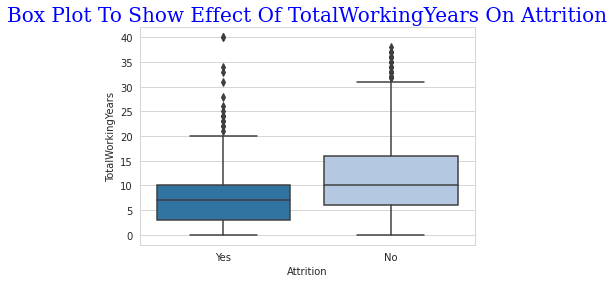

In [34]:
# boxplot to show effect of TotalWorkingYears on attrition
font1 = {'family':'serif','color':'blue','size':20}
sns.boxplot (x = "Attrition", y = "TotalWorkingYears", data = Attr_1, palette = "tab20")
plt.title("Box Plot To Show Effect Of TotalWorkingYears On Attrition", fontdict = font1)

Employees who have worked for the company for a longer period of time appear to be still employed.

Text(0.5, 1.0, 'Box Plot To Show Effect Of MonthlyIncome On Attrition')

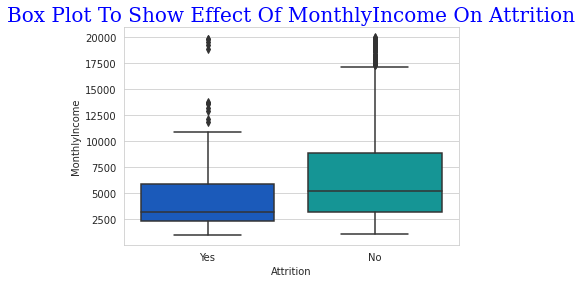

In [35]:
# boxplot to show effect of MonthlyIncome on attrition
font1 = {'family':'serif','color':'blue','size':20}
sns.boxplot (x = "Attrition", y = "MonthlyIncome", data = Attr_1, palette = "winter")
plt.title("Box Plot To Show Effect Of MonthlyIncome On Attrition", fontdict = font1)

Employees who earn more money appear to be still employed by the company.

Text(0.5, 1.0, 'Box Plot To Show Effect Of Age On Attrition')

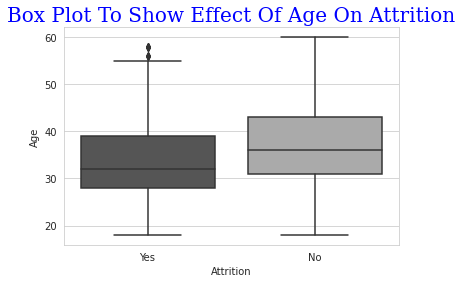

In [36]:
# boxplot to show effect of Age on attrition
font1 = {'family':'serif','color':'blue','size':20}
sns.boxplot (x = "Attrition", y = "Age", data = Attr_1, palette = "gray")
plt.title("Box Plot To Show Effect Of Age On Attrition", fontdict = font1)

Older employees appear to still be in the company.

Text(0.5, 1.0, 'Box Plot To Show Effect Of Education On Attrition')

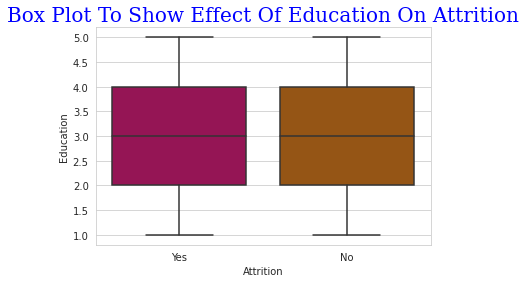

In [37]:
# boxplot to show effect of Education on attrition
font1 = {'family':'serif','color':'blue','size':20}
sns.boxplot (x = "Attrition", y = "Education", data = Attr_1, palette = "brg")
plt.title("Box Plot To Show Effect Of Education On Attrition", fontdict = font1)

Education has no effect on attrition because attrition appears to be distributed evenly across educational levels.

Text(0.5, 1.0, 'Box Plot To Show Effect Of YearsAtCompany On Attrition')

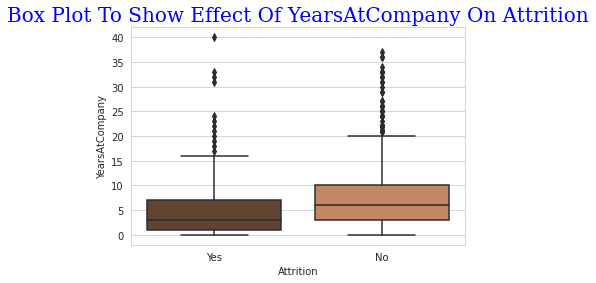

In [38]:
# boxplot to show effect of yearsatcompany on attrition
font1 = {'family':'serif','color':'blue','size':20}
sns.boxplot (x = "Attrition", y = "YearsAtCompany", data = Attr_1, palette = "copper")
plt.title("Box Plot To Show Effect Of YearsAtCompany On Attrition", fontdict = font1)

Employees who have worked longer in the company still appear to be employed.

Text(0.5, 1.0, 'Box Plot To Show Effect Of PerformanceRating On Attrition')

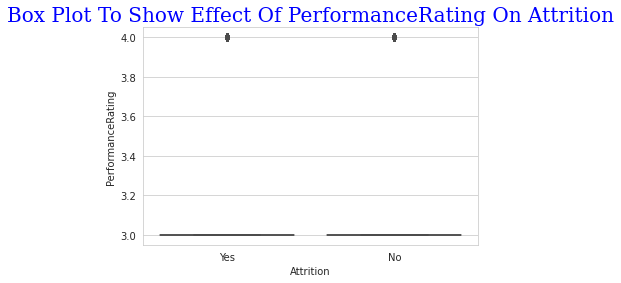

In [39]:
# boxplot to show effect of performance rating on attrition

font1 = {'family':'serif','color':'blue','size':20}
sns.boxplot (x = "Attrition", y = "PerformanceRating", data = Attr_1, palette = "flag")
plt.title("Box Plot To Show Effect Of PerformanceRating On Attrition", fontdict = font1)

No box can be seen between attrition and performance rating.

### From all the box plots above, it shows that the 3 factors behind employee attrition are; <b>Age</b>, <b>MonthlyIncome</b> and <b>TotalWorkingYears</b>. Attrition is higher among younger people. They also earn less, which could be due to a lack of experience and a shorter working year.

## **5.1 WHAT IS THE RELATIONSHIP BETWEEN EDUCATION AND MONTHLY INCOME?**

It is necessary to know what type of Exploratory Analysis to use to investigate the relationship between education and monthly income. The type of Exploratory Analysis to use is determined by the two variables to be compared. <b>Education</b> and <b>MonthlyIncome</b> are both ***numerical*** variables in this case. <b>Scatterplots</b> would be used to examine the relationship between the two variables.

#### **Determine the number of employees by education.**

In [40]:
# to get the count of employees by attrition

# to create dataframe and reset index
Edu = Attr_1["Education"].value_counts()
Edu = (
    pd.DataFrame(Edu)
    .reset_index()
    .rename(columns = {"index" : "Education", "Education" : "Count"})
)
Edu

,Education,Count
0,3,572
1,4,398
2,2,282
3,1,170
4,5,48


According to the above, <b>572</b> employees have <b>Bachelor Degree</b>, <b>398</b> have  <b>Master Degree</b>, <b>282</b> have <b>College Degree</b>, <b>170</b> have <b>Below College Degree</b>, and <b>48</b> have <b>Doctorate Degree</b>. The majority of employees hold Bachelor's degree, while the minority hold Doctorate degree.

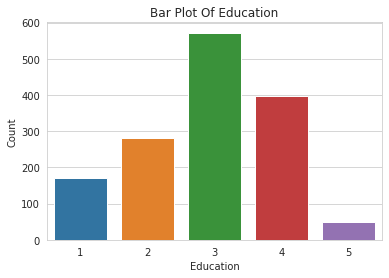

In [41]:
# figure size
figsize = (10, 8)

x, y = "Education", "Count"
sns.barplot (x = x, y = y, data = Edu)
plt.xlabel (f"{x}", size = 10)
plt.ylabel (f"{y}", size = 10)
plt.title(f"Bar Plot Of {x}", size = 12)

plt.show()

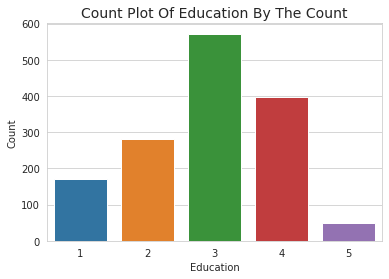

In [42]:
# figure size
figsize = (10, 8)

x = "Education"
sns.countplot (x = x, data = Attr)
plt.xlabel (f"{x}", size=10)
plt.ylabel (f"{y}", size=10)
plt.title (f"Count Plot Of {x} By The {y}", size=14)

plt.show()

The countplot and barplot are graphical representations of the number of employees classified according to their educational level. The barplot and countplots, like the above code, show that Master Degree holders dominate the company.

In [43]:
# to get the correlation between Education and MonthlyIncome
Attr_1["Education"].corr(Attr_1["MonthlyIncome"])

0.09496067704188886

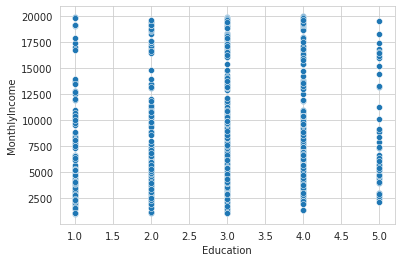

In [44]:
# scatterplot between Education and MonthlyIncome
sns.scatterplot (x = Attr_1["Education"], y = Attr_1["MonthlyIncome"])
plt.show()

**The scatter plot above shows that for every educational level, there are employees who earn high and employees who earn low. The.corr and scatterplot results show that there is no relationship between Education and MonthlyIncome. This can be seen in the scatterplot's vertical lines. As a result, it can be stated that education has little to do with monthly income (Monthly Income is not dependent on Educational qualification).**

## **5.2 WHAT IS THE EFFECT OF AGE ON ATTRITION?**

**Because age is a numerical variable and attrition is a categorical variable, a box plot and a bar plot would be used to determine the effect of age on attrition in this case.**

##### **To group the employees by their age range**

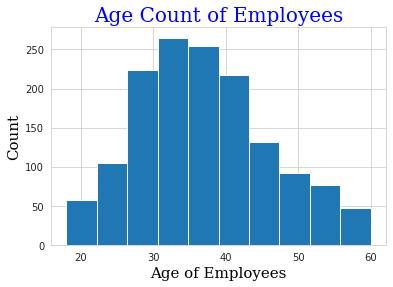

In [45]:
# histogram to group employees age range
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':15}

plt.hist (Attr_1["Age"])
plt.xlabel ("Age of Employees", fontdict = font2)
plt.ylabel ("Count", fontdict = font2)
plt.title ("Age Count of Employees", fontdict = font1)

plt.show()

From the histogram above, it shows majority of employees fall between the age of 30 and 42.

In [46]:
# to group employees by their age

# to create dataframe and reset index
age = Attr_1["Age"].value_counts()
age = (
    pd.DataFrame(age)
    .reset_index()
    .rename(columns = {"index" : "Age", "Age" : "Count"})
)
age

,Age,Count
0,35,78
1,34,77
2,36,69
3,31,69
4,29,68
5,32,61
6,30,60
7,33,58
8,38,58
9,40,57


Age <b>35</b> has the highest number of employees while age <b>42</b> has the lowest number of employees.

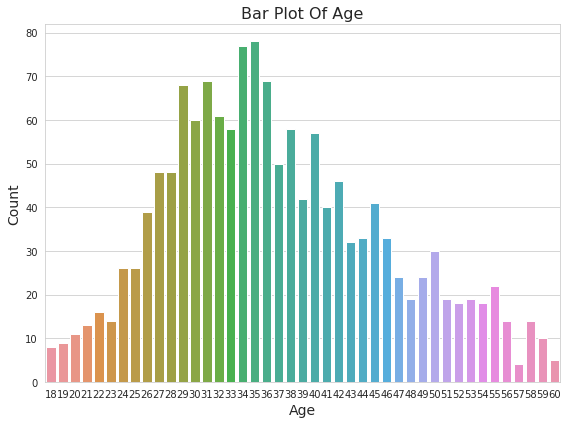

In [47]:
# figure size
plt.figure(figsize=[8, 6])  

x, y = "Age", "Count"
sns.barplot(x=x, y=y, data=age)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Bar Plot Of {x}", size=16)

plt.tight_layout()
plt.show()

The histogram grouped and displayed the ages in groups, while the bar plot above shows each age and its count in detail.

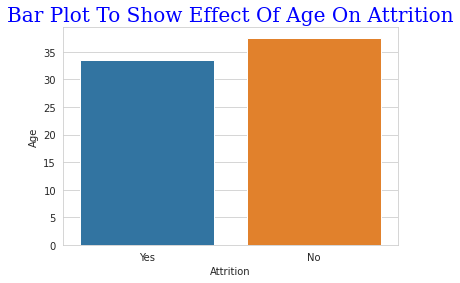

In [48]:
# bar plot to show effect of age on attrition

font1 = {'family':'serif','color':'blue','size':20}

sns.barplot(
    data = Attr_1,
    x = "Attrition",
    y = "Age",
    ci = None
)

plt.title ("Bar Plot To Show Effect Of Age On Attrition", fontdict = font1)
plt.show()

Text(0.5, 1.0, 'Box Plot To Show Effect Of Age On Attrition')

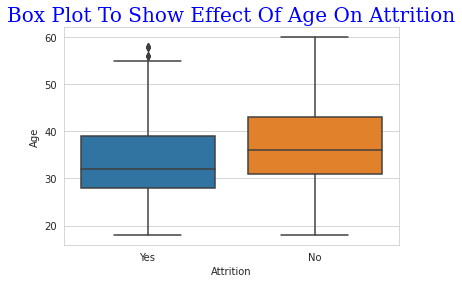

In [49]:
# box plot to show effect of age on attrition

font1 = {'family':'serif','color':'blue','size':20}
sns.boxplot (x = "Attrition", y = "Age", data = Attr_1, palette = "tab10")

plt.title("Box Plot To Show Effect Of Age On Attrition", fontdict = font1)

<b>The bar and box plots above show that the employees who have left are more likely to be younger than older. Employees aged 30 to 42 are still employed by the company. This implies that older employees stay with the company longer than younger employees. This could be due to more years of experience and knowledge of corporate systems and environments. The effect of age on attrition could thus be stated as follows: the older an employee is, the more likely the employee will remain with the company. This could be because an increase in age is likely to result in an increase in work experience, which will help employees gain a better understanding and mastery of job experience over time.</b>

## **5.3 IS INCOME THE MAIN FACTOR IN EMPLOYEE ATTRITION?**

To answer this, some factors must be considered:


* Does overtime have an impact on monthly earnings?
* Is there any other factor that influences income payment?


In this case, box plots and scatter plots will be used.

In [50]:
# to count the employees by monthly income 

# to create dataframe and reset index
income = Attr_1["MonthlyIncome"].value_counts()
income = (
    pd.DataFrame(income)
    .reset_index()
    .rename(columns = {"index" : "MonthlyIncome", "MonthlyIncome" : "Count"})
)
income

,MonthlyIncome,Count
0,2342,4
1,6142,3
2,2741,3
3,2559,3
4,2610,3
...,...,...
1344,7104,1
1345,2773,1
1346,19513,1
1347,3447,1


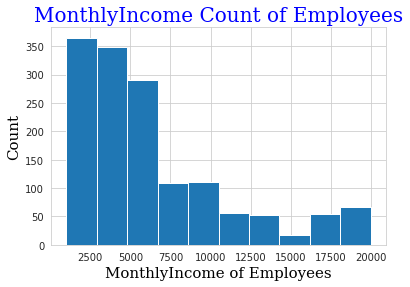

In [51]:
# histogram to group employees age range
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'black','size':15}

plt.hist (Attr_1["MonthlyIncome"])
plt.xlabel ("MonthlyIncome of Employees", fontdict = font2)
plt.ylabel ("Count", fontdict = font2)
plt.title ("MonthlyIncome Count of Employees", fontdict = font1)

plt.show()

The histogram above shows that majority of the employees earn between 2342 and 5000.

Text(0.5, 1.0, 'Box Plot of Employees Attrition and MonthlyIncome')

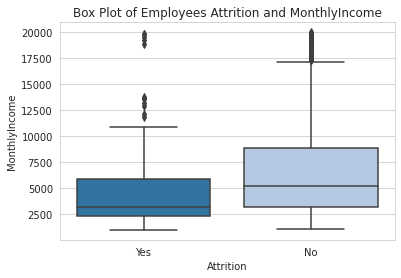

In [52]:
# Box plot of attrition and monthly income
sns.boxplot (x = "Attrition", y = "MonthlyIncome", data = Attr_1, palette = "tab20")
plt.title ("Box Plot of Employees Attrition and MonthlyIncome")


This shows that majority of employees not attrited earn more.

**Does overtime have an impact on monthly earning?**

<Figure size 576x288 with 0 Axes>

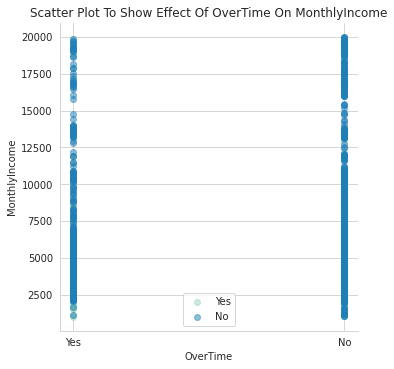

<Figure size 576x288 with 0 Axes>

In [53]:
# scatter plot to show effect of overtime on monthly income
g = sns.PairGrid(Attr_1,x_vars=["OverTime"],y_vars="MonthlyIncome",hue="Attrition",palette="YlGnBu",height=5)
g.map(plt.scatter,alpha=0.5)
plt.title("Scatter Plot To Show Effect Of OverTime On MonthlyIncome")
plt.legend(loc=(0))
plt.figure(figsize=(8,4))

Text(0.5, 1.0, 'Box Plot To Show Effect Of OverTime On MonthlyIncome')

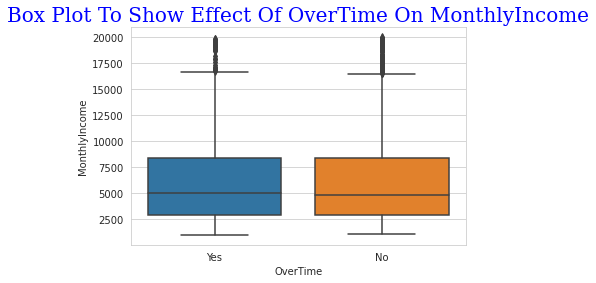

In [54]:
# box plot to show effect of overtime on monthlyincome

font1 = {'family':'serif','color':'blue','size':20}
sns.boxplot (x = "OverTime", y = "MonthlyIncome", data = Attr_1, palette = "tab10")

plt.title("Box Plot To Show Effect Of OverTime On MonthlyIncome", fontdict = font1)

According to the above boxplot and scatterplot, overtime has no effect on monthly income. Those who have been attrited and those who have not have nearly identical values of overtime in respect to monthly income.

**Are there any other factors that affect monthly income?**

<Figure size 576x288 with 0 Axes>

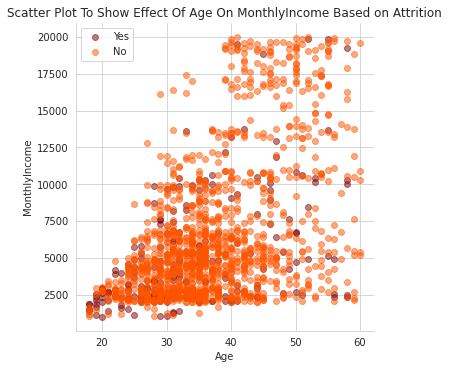

<Figure size 576x288 with 0 Axes>

In [55]:
# scatterplot of age and monthly income using attrition as the hue
g = sns.PairGrid(Attr_1,x_vars=["Age"],y_vars=["MonthlyIncome"],hue="Attrition",palette="gist_heat",height=5)
g.map(plt.scatter,alpha=0.5)
plt.legend(loc=(0))
plt.title("Scatter Plot To Show Effect Of Age On MonthlyIncome Based on Attrition")

plt.figure(figsize=(8,4))

According to the scatter plot above, the majority of employees who have been attrited earn less and are younger in age.

<Figure size 576x288 with 0 Axes>

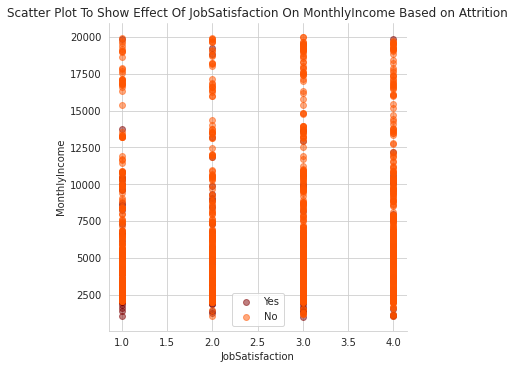

<Figure size 576x288 with 0 Axes>

In [56]:
# scatterplot to show jobsatisfaction and monthlyincome based on attrition
g = sns.PairGrid(Attr_1,x_vars=["JobSatisfaction"],y_vars=["MonthlyIncome"],hue="Attrition",palette="gist_heat",height=5)
g.map(plt.scatter,alpha=0.5)
plt.title("Scatter Plot To Show Effect Of JobSatisfaction On MonthlyIncome Based on Attrition")
plt.legend(loc=(0))
plt.figure(figsize=(8,4))

<Figure size 576x288 with 0 Axes>

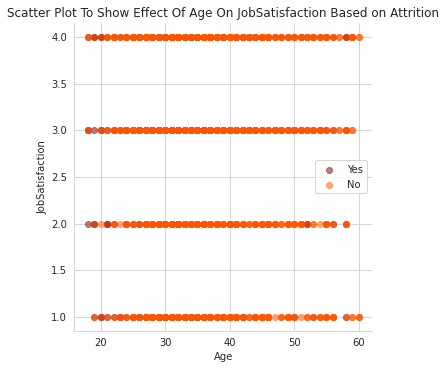

<Figure size 576x288 with 0 Axes>

In [57]:
# scatterplot to show age and jobsatisfaction based on attrition
g = sns.PairGrid(Attr_1,x_vars=["Age"],y_vars=["JobSatisfaction"],hue="Attrition",palette="gist_heat",height=5)
g.map(plt.scatter,alpha=0.5)
plt.title("Scatter Plot To Show Effect Of Age On JobSatisfaction Based on Attrition")
plt.legend(loc=(0))
plt.figure(figsize=(8,4))

Although the scatter plots between (job satisfaction and monthly income), and (Age and JobSatisfaction) have no correlation because the scatterplot shows vertical lines, it can be seen that the majority of employees attrited have low job satisfaction, and the majority of those with low job satisfaction are younger in age.

**According to the plots above, income is not the main factor in employee attrition. Because income is based on age, age is the main factor. Older employees have a better chance of earning a higher salary.**

## **5.4 HOW DOES WORK-LIFE BALANCE AFFECT THE OVERALL ATTRITION RATE?**

In [58]:
# to get the percentage of employees based on attrition
(Attr_1["Attrition"].value_counts() / Attr_1["Attrition"].count())*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

83.88 (to two decimal places) of employees have not been attrited, while 16.12 have been.

In [59]:
# to get the count of the employees based on their worklife balance
Attr_1["WorkLifeBalance"].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

Majority of employees have a better work-life balance while a very low number of employees have bad work-life balance.

In [60]:
# to get the percentage employees by their worklife balance
(Attr_1["WorkLifeBalance"].value_counts() / Attr_1["WorkLifeBalance"].count())*100

3    60.748299
2    23.401361
4    10.408163
1     5.442177
Name: WorkLifeBalance, dtype: float64

**60.7%** of employees have better worklife balance, <b>23.4%</b> have good worklife balance, <b>10.4%</b> have the best worklifebalance, <b>5.4%</b> have bad worklife balance.

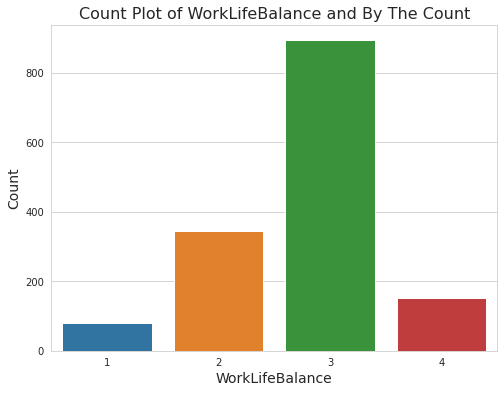

In [61]:
# countplot to show employees count based on work life balance
# figure size
plt.figure(figsize=[8, 6]) 

x = "WorkLifeBalance"
sns.countplot(x=x, data=Attr_1)
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} and By The {y}", size=16)


plt.show()

This is a graphical representation of the above codes, that shows majority of the employees have a better worklife balance.

In [62]:
# to group by worklife balance
Bal = Attr_1.groupby("WorkLifeBalance")

In [63]:
# to get the count of attrition for each worklife balance
Bal = Attr_1.groupby("WorkLifeBalance").Attrition.value_counts()
Bal

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Attrition, dtype: int64

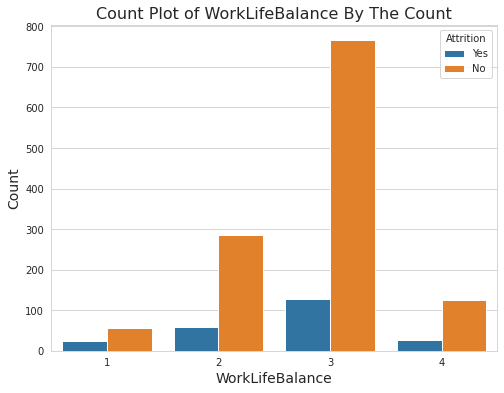

In [64]:
# to count and compare worklife balance and attrition
#figure size
plt.figure(figsize=[8, 6])  

x = "WorkLifeBalance"
sns.countplot(x=x, data=Attr_1, hue = "Attrition")
plt.xlabel(f"{x}", size=14)
plt.ylabel(f"{y}", size=14)
plt.title(f"Count Plot of {x} By The {y}", size=16)


plt.show()

**According to the graph above, employee attrition is directly proportional to work-life balance (i.e., those employees with a high work-life balance also have the greatest number of employees still in the company). The graph confirms that the 766 employees with no attrition have better work-life balance. Worklife balance does not completely affect attrition, though a large proportion of those who remain in the company have a better worklife balance.**

# **6. CONCLUSION**

Exploratory Data Analysis was used in this project to answer the five major questions.
Employee attrition is caused by a variety of factors; in this IBM employee attrition data set, age, monthly income, and total working years are the most important. The employee rate in this data set is <b>16.12%</b>, indicating a relatively low attrition rate (a good attrition rate is less than 10%).

In [65]:
# to calculate attrition rate
Attrition= (Attr_1["Attrition"].value_counts().min() / Attr_1["Attrition"].count()) *100
print ("Attrition Rate = ", round(Attrition, 2))

Attrition Rate =  16.12


#**7. RESOURCES**

[Employee Attrition Definition](https://www.teamly.com/blog/employee-attrition/)<br>
[Data Cleaning](https://www.tableau.com/learn/articles/what-is-data-cleaning)<br>
[Kurtosis](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/)<br>[Exploratory Data Analysis](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e)<br> [Notebook On Data Manipulation](https://colab.research.google.com/drive/1_hwXRngpM5Wf9VcP0LdxFdOXGSt6eHrb#scrollTo=pDTif0A9Ye21)<br>[EDA](https://docs.google.com/presentation/d/1i4W7HXcev8NAOJdA2pfb6ZXJhUckHw8_cX8I7V882Pc/edit#slide=id.p)<BR>[Data Visualization](https://docs.google.com/presentation/d/1mXwwryYIia0BTNBfWtqxxb9hSw8j7SwkFvJzJTzMAIw/edit#slide=id.g14010b54ee9_0_0)